#### <center> Exploratory Data Analysis & Sales Insights: FMCG Sector (2022–2024)
<center> Prepared by: [Simran]


## Data Collection 
The dataset used in this project was sourced from Kaggle – [Click here to open FMCG Dataset](https://www.kaggle.com/datasets/beatafaron/fmcg-daily-sales-data-to-2022-2024/data)
- Domain: Fast-Moving Consumer Goods (FMCG)
- Time Period Covered: January 2022 – June 2024
- Frequency: Daily sales records
- Source Type: Open-source dataset (CSV format) available on Kaggle
- Collection Method: Downloaded and imported into Python using Pandas

## Data Understanding 
This dataset contains daily sales and inventory details of FMCG products from 2022 to 2024. It tracks product information, sales performance, stock movement, promotions, and delivery status across different regions and channels.

Column Descriptions:
- date → The specific date of sales or stock record.
- sku → Stock Keeping Unit, a unique product code used to identify each item.
- brand → The company/manufacturer name of the product .
- segment → The type of market/product line the item belongs to .
- category → The broader product classification (e.g., Snacks, Beverages, Dairy).
- channel → The sales medium (e.g., E-commerce, Retail, Discount).
- region → The geographical area where the product was sold (e.g., North, South).
- pack_type → The packaging format (e.g., bottle, pouch, box).
- price_unit → The selling price of one unit of the product.
- promotion_flag → Indicator (1/0) showing whether the product was under promotion/discount.
- delivery_days → The number of days taken to deliver the product.
- stock_available → The quantity of stock available before sales.
- delivered_qty → The number of units delivered to the customer.
- units_sold → The actual number of units sold.

## Importing All Essential Laibraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data

In [2]:
df= pd.read_csv(r"C:\Users\huzef\Downloads\FMCG_2022_2024.csv")

I imported the dataset into Python using Pandas and stored it in a dataframe named df

## Data Cleaning

In [3]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


I checked the first five rows of the dataset using df.head(). This helps me quickly look at the structure of the data, the column names, and the kind of values stored.”

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  object 
 1   sku              190757 non-null  object 
 2   brand            190757 non-null  object 
 3   segment          190757 non-null  object 
 4   category         190757 non-null  object 
 5   channel          190757 non-null  object 
 6   region           190757 non-null  object 
 7   pack_type        190757 non-null  object 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190757 non-null  int64  
 12  delivered_qty    190757 non-null  int64  
 13  units_sold       190757 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 20.4+ MB


Then I used df.info() to see details like the total number of rows, columns, and the data types. The dataset contains 190,757 rows and 14 columns. All columns are complete with no missing values.

In [5]:
df.isnull().sum()

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
dtype: int64

Next, I checked for missing values in the dataset. This step is important because missing data can affect the accuracy of our analysis

In [6]:
df.describe()

,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
count,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000
mean,5.251979,0.149200,3.004860,157.697652,179.333655,19.919709
std,2.166705,0.356287,1.414626,52.736104,40.037475,11.770077
min,1.500000,0.000000,1.000000,-12.000000,-11.000000,-25.000000
25%,3.380000,0.000000,2.000000,124.000000,152.000000,12.000000
50%,5.250000,0.000000,3.000000,155.000000,179.000000,18.000000
75%,7.130000,0.000000,4.000000,192.000000,206.000000,25.000000
max,9.000000,1.000000,5.000000,405.000000,366.000000,139.000000


Then I used df.describe() to generate summary statistics like mean, minimum, maximum, and percentiles. This gives a quick overview of the dataset’s distribution.

In [7]:
df.duplicated().sum()

np.int64(0)

## Overall Data Cleaning Observation 
After performing the data cleaning steps such as checking for missing values, duplicate rows, and outliers, the dataset appears to be well-structured and already clean.
- No significant missing values were found.
- No duplicate records were present in the dataset.
- Column names and data types are consistent and properly formatted.
- The dataset follows a logical structure with clear definitions of sales, stock, and product details.

👉 This means the dataset is ready for analysis without requiring major cleaning efforts.


## Checking values integrity among non-numeric cols

In [8]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


In [9]:
df.brand.unique()

array(['MiBrand1', 'MiBrand4', 'YoBrand4', 'YoBrand2', 'YoBrand1',
       'YoBrand3', 'ReBrand1', 'ReBrand4', 'MiBrand3', 'JuBrand3',
       'SnBrand2', 'ReBrand2', 'SnBrand3', 'MiBrand2'], dtype=object)

In [10]:
df.segment.unique()

array(['Milk-Seg3', 'Milk-Seg2', 'Yogurt-Seg2', 'Yogurt-Seg1',
       'Yogurt-Seg3', 'ReadyMeal-Seg2', 'ReadyMeal-Seg1', 'Juice-Seg3',
       'SnackBar-Seg3', 'ReadyMeal-Seg3', 'SnackBar-Seg2',
       'SnackBar-Seg1', 'Milk-Seg1'], dtype=object)

In [11]:
df.category.unique()

array(['Milk', 'Yogurt', 'ReadyMeal', 'Juice', 'SnackBar'], dtype=object)

In [12]:
df.channel.unique()

array(['Retail', 'Discount', 'E-commerce'], dtype=object)

In [13]:
df.region.unique()

array(['PL-Central', 'PL-North', 'PL-South'], dtype=object)

In [14]:
df.pack_type.unique()

array(['Multipack', 'Single', 'Carton'], dtype=object)

I checked the non-numeric columns like brand, segment, category, region, and pack type. All values were consistent, with no spelling errors or irregular entries. This means the dataset is already clean and ready for analysis.

### Finding illogical cases in numeric features, and removing those records

In [15]:
df[df['units_sold']<0]

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
70489,2023-07-26,SN-028,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,2.91,0,5,-2,-3,-3
83501,2023-09-21,SN-010,SnBrand2,SnackBar-Seg2,SnackBar,Retail,PL-Central,Carton,8.60,1,4,-12,-11,-25
123633,2024-03-14,RE-007,ReBrand4,ReadyMeal-Seg1,ReadyMeal,Discount,PL-Central,Carton,2.38,0,4,-6,-7,-8


I checked for illogical numeric cases, for example negative sales values. Since it’s not possible to sell negative units, such records are considered data errors. If found, they should be removed to keep the dataset accurate."

In [16]:
# Drop rows where units_sold is negative
df = df[df['units_sold'] >= 0]

We removed rows where units_sold was negative, keeping only valid sales records

In [17]:
df[df['delivered_qty']<0]

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold


Here I checked if any product has negative delivered quantity. Since deliveries can’t be negative, such rows would be considered errors and removed. In my dataset, this check ensures delivery data is valid

In [18]:
df[df["stock_available"]<0]

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold


Here I checked if the dataset has any cases where stock available is negative. Since stock can’t go below zero, such values would be invalid. This step ensures stock data is realistic and consistent

## Data Transformation

Now that our data is clean, the next step is transformation. This means creating new useful columns (like revenue = units_sold × price_unit, stock_left, etc.)

a) Extract revenue column

In [19]:
df['revenue'] = df['units_sold']*df['price_unit']

Here I am creating a new column called revenue. It is calculated by multiplying the number of units sold with the price of each unit. This gives us the total sales revenue for each product transaction

b) creating a column to know how much stock is left: stockleft

In [20]:
# Create a new column 'stock_left'
df['stock_left'] = df['stock_available'] - df['delivered_qty']

Now I created a new column called stock_left. It tells us how much stock is remaining after delivering the products. We get this by subtracting the delivered quantity from the available stock

c) Finding those records whose stock have become 0: stock_out

In [21]:
df["stock_out"] = df['stock_left'] >=0
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,revenue,stock_left,stock_out
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42,13,True
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,0.00,-129,False
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00,-43,False
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12,-33,False
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92,-56,False


I also created a new column called stock_out, which tells us whether a product is completely out of stock or not. If the remaining stock is zero, it will show True, otherwise False.

In [22]:
#Create delivery status column
df['delivery_status'] = df['delivery_days'].apply(lambda x: 'On Time' if x <= 3 else 'Delayed')
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,revenue,stock_left,stock_out,delivery_status
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42,13,True,On Time
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,0.00,-129,False,On Time
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00,-43,False,Delayed
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12,-33,False,On Time
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92,-56,False,Delayed


I created a new column called delivery_status to categorize delivery performance. If a product was delivered in 3 days or less, it is marked as On Time. If it took more than 3 days, it is marked as Delayed. This helps us quickly analyze delivery efficiency instead of just looking at raw numbers

## EDA

Now that we have cleaned the data and added new useful columns like revenue, stock_left, stock_out, and delivery_status, the dataset is ready for Exploratory Data Analysis (EDA).
EDA will help us identify trends, patterns, and insights such as revenue growth, sales performance, delivery efficiency, and stock management. This is the stage where we move from just having data to actually extracting business insights."

a) What are the top-selling SKUs by units and revenue?

In [23]:
# Top SKUs by Units Sold
top_skus_units = df.groupby("sku")['units_sold'].sum().sort_values(ascending=False).head(10)
print(top_skus_units.head())

sku
YO-029    177798
YO-005    176095
YO-012    170575
MI-026    152324
RE-004    149559
Name: units_sold, dtype: int64


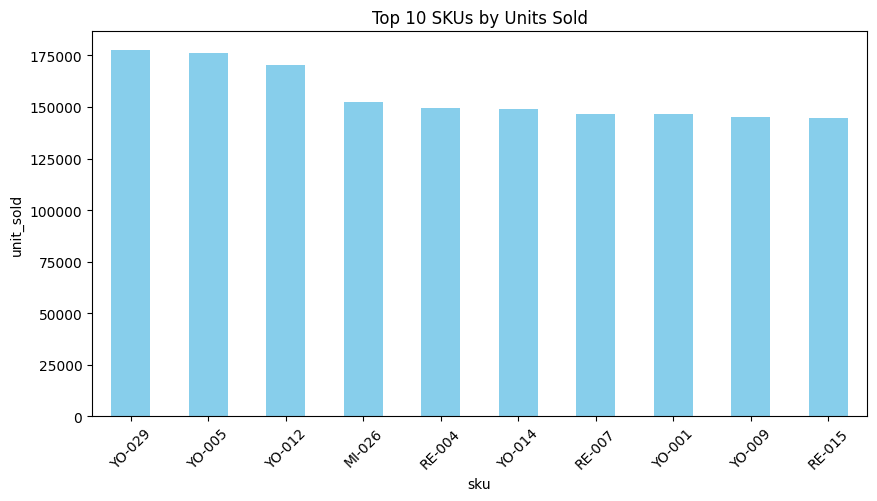

In [24]:
plt.figure(figsize=(10,5))
top_skus_units.plot(kind='bar', color='skyblue')
plt.title("Top 10 SKUs by Units Sold")
plt.xlabel("sku")
plt.ylabel("unit_sold")
plt.xticks(rotation=45)
plt.show()

The chart shows the Top 10 SKUs by Units Sold. Products like YO-029, YO-005, and YO-012 have the highest sales, each exceeding 170,000 units, indicating strong customer demand. Other products such as M-026, RE-004, and YO-014 also perform well but at a slightly lower sales volume (~150,000 units). The consistency across the top SKUs highlights a stable demand trend for these key products.

Insight: These SKUs are the company’s best-sellers and should be prioritized in inventory planning and marketing to avoid stockouts and maintain revenue growth.

In [25]:
# Top SKUs by Revenue (units_sold × price_unit)
top_skus_revenue = df.groupby("sku")['revenue'].sum().sort_values(ascending=False).head(10)
print(top_skus_revenue.head())


sku
YO-029    931878.44
YO-005    913420.95
YO-012    899410.48
MI-026    796853.75
RE-004    792286.33
Name: revenue, dtype: float64


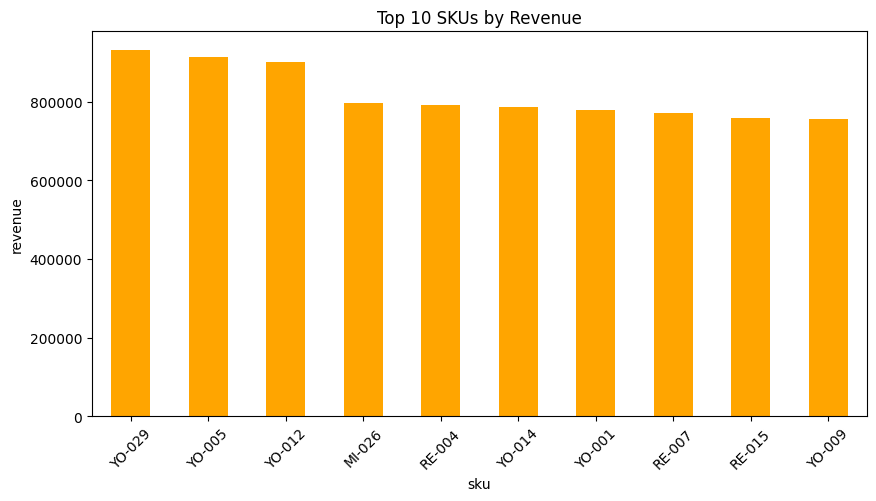

In [26]:
plt.figure(figsize=(10,5))
top_skus_revenue.plot(kind='bar', color='orange')
plt.title("Top 10 SKUs by Revenue")
plt.xlabel("sku")
plt.ylabel("revenue")
plt.xticks(rotation=45)
plt.show()

The analysis shows that SKUs YO-029, YO-005, and YO-012 consistently appear at the top in both units sold and total revenue. This means these products not only sell the most in quantity but also generate the highest revenue. It indicates strong customer demand as well as good pricing for these SKUs.

b) Which brands/segments/categories have the highest sales?

In [27]:
# Top Brands by Revenue
top_brands = df.groupby("brand")["revenue"].sum().sort_values(ascending=False)
print("Top Brand : \n", top_brands)

# Top Brands bySegment
top_segment = df.groupby("segment")["revenue"].sum().sort_values(ascending = False)
print("Top segemnt: \n", top_segment)

# Top Brands by Categories
top_categories = df.groupby("category")["revenue"].sum().sort_values(ascending = False)
print("Top Category: \n", top_categories)

Top Brand : 
 brand
SnBrand2    2860654.57
YoBrand4    2473953.74
YoBrand3    2116950.30
YoBrand2    2015514.93
MiBrand3    1664244.74
YoBrand1    1619774.34
ReBrand4    1530928.06
ReBrand2    1253133.67
MiBrand1    1134908.75
MiBrand4     796853.75
ReBrand1     792286.33
JuBrand3     652277.27
SnBrand3     540694.72
MiBrand2     499368.18
Name: revenue, dtype: float64
Top segemnt: 
 segment
Yogurt-Seg1       2965556.48
Yogurt-Seg3       2792775.59
Yogurt-Seg2       2467861.24
Milk-Seg2         2205768.76
SnackBar-Seg1     1614562.38
ReadyMeal-Seg1    1530928.06
ReadyMeal-Seg2    1407645.19
Milk-Seg3         1390238.48
SnackBar-Seg2     1182046.30
Juice-Seg3         652277.27
ReadyMeal-Seg3     637774.81
SnackBar-Seg3      604740.61
Milk-Seg1          499368.18
Name: revenue, dtype: float64
Top Category: 
 category
Yogurt       8226193.31
Milk         4095375.42
ReadyMeal    3576348.06
SnackBar     3401349.29
Juice         652277.27
Name: revenue, dtype: float64


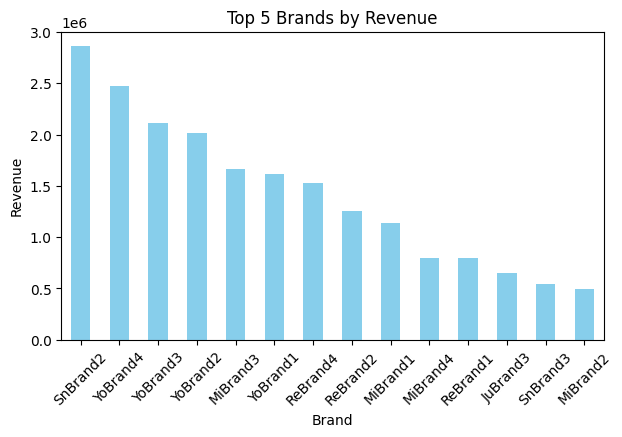

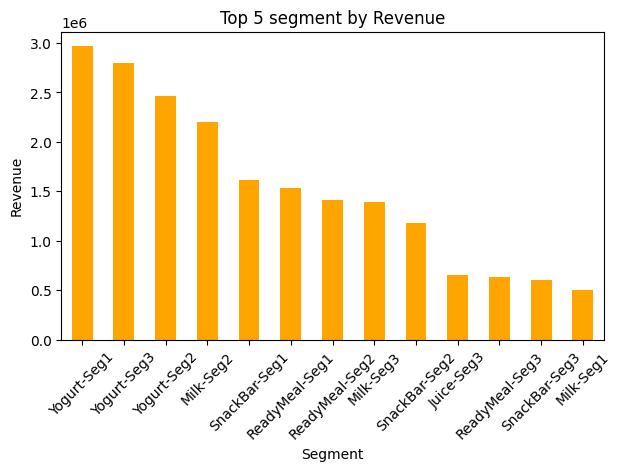

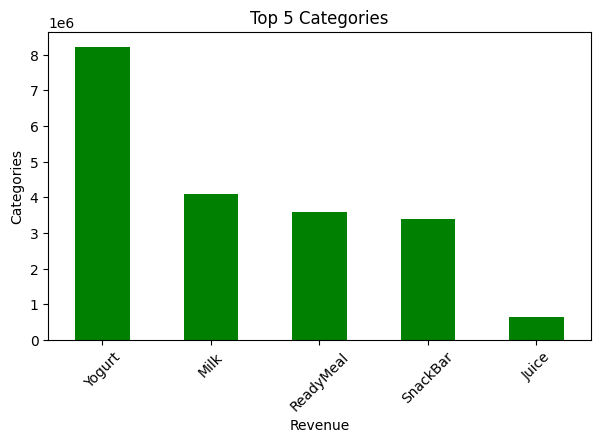

In [28]:
# plot 1 = Top brands
plt.figure(figsize = (7,4) )
top_brands.plot(kind='bar', color='skyblue')
plt.title("Top 5 Brands by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.show()

# plot 2 = Top segments
plt.figure(figsize = (7,4))
top_segment.plot(kind = "bar",color ="orange")
plt.title("Top 5 segment by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Segment")
plt.xticks(rotation = 45)
plt.show()

# plot 3 = Top Categories 
plt.figure(figsize = (7,4))
top_categories.plot(kind= "bar", color = "green")
plt.title("Top 5 Categories")
plt.xlabel("Revenue")
plt.ylabel("Categories")
plt.xticks(rotation = 45)
plt.show()

## Observation
- Brands: YoBrand (YoBrand2, YoBrand4, YoBrand3) leads revenue, while some MiBrand and SnBrand underperform.
- Segments: Yogurt segments dominate sales, followed by Milk and SnackBars. ReadyMeals and Juice contribute less.
- Categories: Dairy (Yogurt + Milk) is the main revenue driver; raedymeal & Snacks are moderate, while Juice lag behind.

## Insights
- Yogurt is the star product – it contributes the highest revenue across segments, making it the backbone of sales.
- Among brands, YoBrand dominates, showing strong customer preference and brand trust.
- Milk and Readymeal are secondary contributors, giving steady but lower revenue compared to Yogurt.
- Categories like Juice show low revenue, indicating either low demand or weaker marketing/distribution.
- Heavy reliance on Dairy (Yogurt + Milk) means the business is less diversified, which could be risky if demand shifts.

## Recomandation 
- Strengthen Yogurt portfolio – Since Yogurt is the top revenue driver, keep launching new flavors/variants and push more promotions.
- Expand Milk & SnackBars & Readymeal – Invest in marketing and improve distribution to boost their share and reduce dependency on Yogurt.
- Revive low-performing categories (Juice) – Analyze why sales are weak (pricing, promotion, taste) and redesign strategy.
- Brand Strategy – Focus on YoBrand as the flagship, but also nurture smaller brands to balance the portfolio.
- Risk Diversification – Reduce over-reliance on Dairy products by promoting non-dairy categories more aggressively

c) “Is there a significant difference in unit pricing across different pack types (Single, Multipack, Carton)?

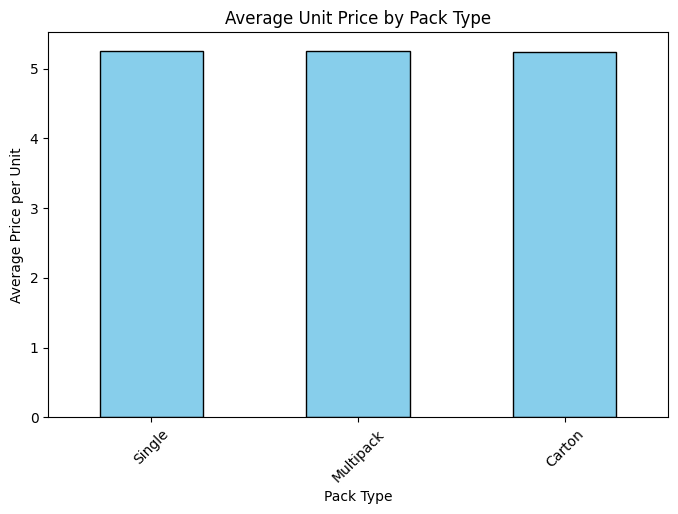

In [29]:
# Average price by pack type
avg_price_pack = df.groupby('pack_type')['price_unit'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
avg_price_pack.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Average Unit Price by Pack Type")
plt.xlabel("Pack Type")
plt.ylabel("Average Price per Unit")
plt.xticks(rotation=45)
plt.show()

## Observation 
The chart shows that the average unit price is almost the same across all pack types (Single, Multipack, and Carton). This indicates that there is no significant pricing advantage or premium for multipacks or cartons compared to single units. Customers are paying roughly the same per unit regardless of pack format, meaning that profitability differences may come more from sales volume rather than unit price.

d) Which products sell the most in each region, and are some products popular only in specific regions?”

In [30]:
# Group data by region and SKU to check revenue
region_product_sales = df.groupby(['region', 'sku'])['revenue'].sum().reset_index()

# Find top 5 products per region
top_products_by_region = region_product_sales.groupby('region').apply(
    lambda x: x.nlargest(5, 'revenue')).reset_index(drop=True)

print(top_products_by_region)

        region     sku    revenue
0   PL-Central  YO-029  310306.93
1   PL-Central  YO-012  304946.54
2   PL-Central  YO-005  304409.42
3   PL-Central  MI-026  266422.26
4   PL-Central  RE-004  261995.92
5     PL-North  YO-029  310962.33
6     PL-North  YO-005  309166.41
7     PL-North  YO-012  299788.61
8     PL-North  RE-004  267967.40
9     PL-North  MI-026  265842.73
10    PL-South  YO-029  310609.18
11    PL-South  YO-005  299845.12
12    PL-South  YO-012  294675.33
13    PL-South  YO-001  267941.38
14    PL-South  MI-026  264588.76


C:\Users\huzef\AppData\Local\Temp\ipykernel_22164\2095108938.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_region = region_product_sales.groupby('region').apply(


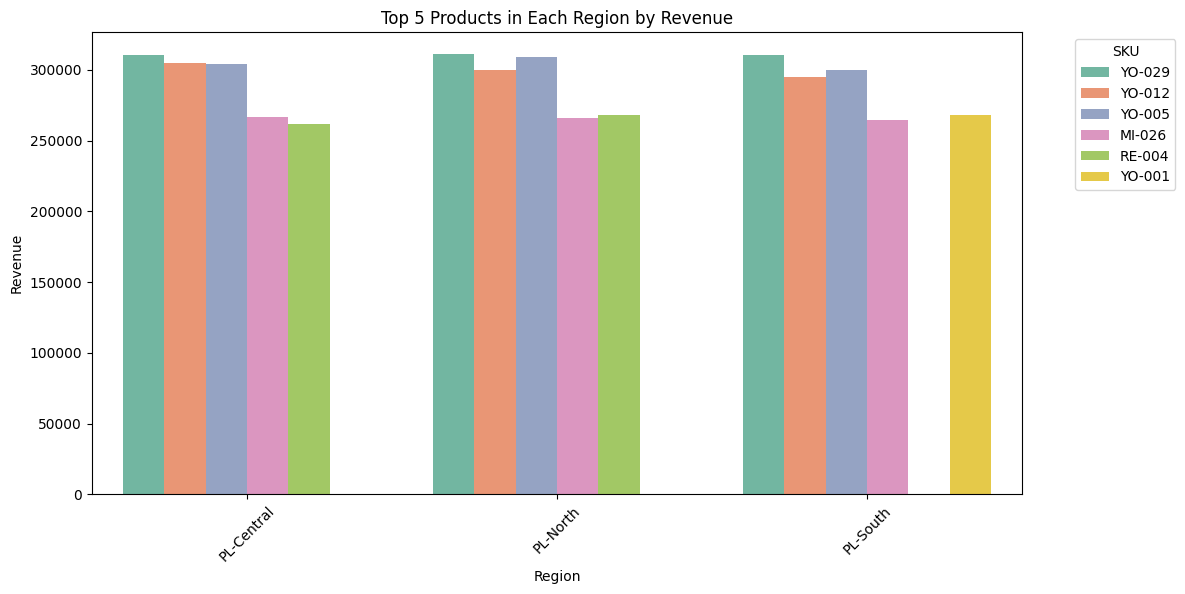

In [31]:
sns.set_palette("Set2")
plt.figure(figsize=(12,6))
sns.barplot(data=top_products_by_region, x='region', y='revenue', hue='sku')
plt.title("Top 5 Products in Each Region by Revenue")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.xlabel("Region")
plt.legend(title="SKU", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Observation 
YO-029 is the clear leader across all regions, showing universal demand. In both Central and North, YO-005 and YO-012 are strong contributors, and the same trend continues in South, where YO-005 and YO-012 remain in the top rankings alongside YO-001 and MI-026. This shows that while YO-029 dominates everywhere, each region also has additional products that contribute significantly.

## 2. Sales Performance Analysis

a) How has total revenue changed over time (day, week, month), and are there any clear demand peaks or seasonal patterns?

In [32]:
temp = df.copy()

In [33]:
df['date'] = pd.to_datetime(df['date'])

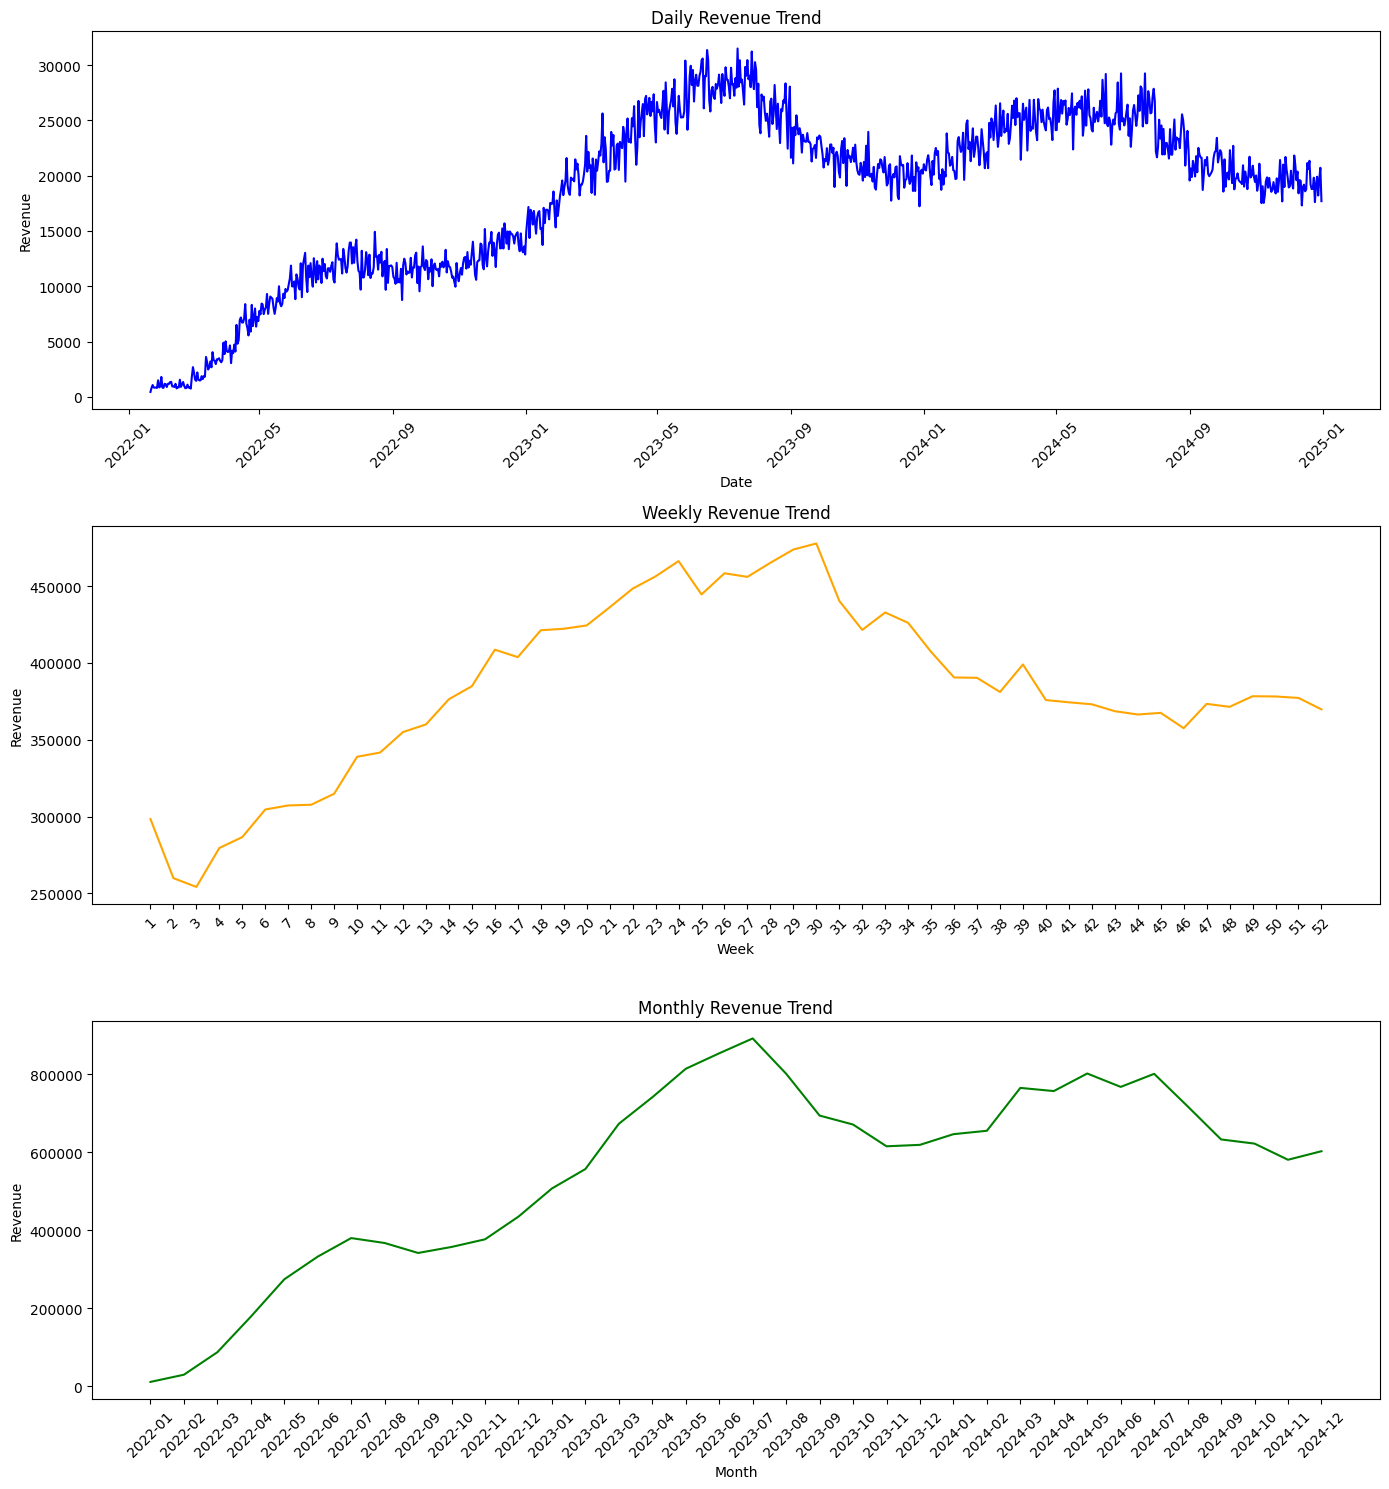

In [34]:
#daily Revenue
daily_revenue = df.groupby('date')['revenue'].sum().reset_index()

# Weekly Revenue
df['week'] = df['date'].dt.isocalendar().week
weekly_revenue = df.groupby('week')['revenue'].sum().reset_index()

# Monthly Revenue
df['month'] = df['date'].dt.to_period('M')
monthly_revenue = df.groupby('month')['revenue'].sum().reset_index()

# Plots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(14, 15))

# Daily
axes[0].plot(daily_revenue['date'], daily_revenue['revenue'], color='blue')
axes[0].set_title("Daily Revenue Trend")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Revenue")
axes[0].tick_params(axis='x', rotation=45)

# Weekly
axes[1].plot(weekly_revenue['week'].astype(str), weekly_revenue['revenue'], color='orange')
axes[1].set_title("Weekly Revenue Trend")
axes[1].set_xlabel("Week")
axes[1].set_ylabel("Revenue")
axes[1].tick_params(axis='x', rotation=45)

# Monthly
axes[2].plot(monthly_revenue['month'].astype(str), monthly_revenue['revenue'], color='green')
axes[2].set_title("Monthly Revenue Trend")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Revenue")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Observation 
- Daily Trend: Revenue shows a lot of ups and downs each day, with some days having high sales and others being low.
- Weekly Trend: Revenue looks more stable week by week, but a few weeks still show clear peaks (maybe due to offers or events).
- Monthly Trend: At the monthly level, revenue shows clear patterns — some months consistently perform better, which may indicate seasonal demand

b) Which regions or channels generate the most revenue?

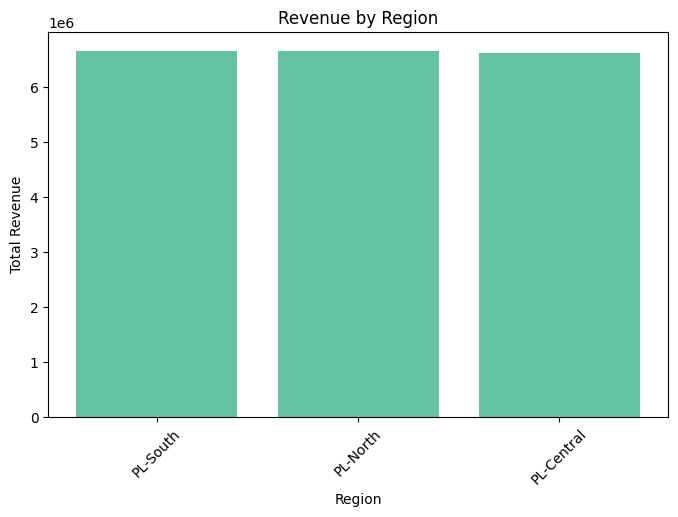

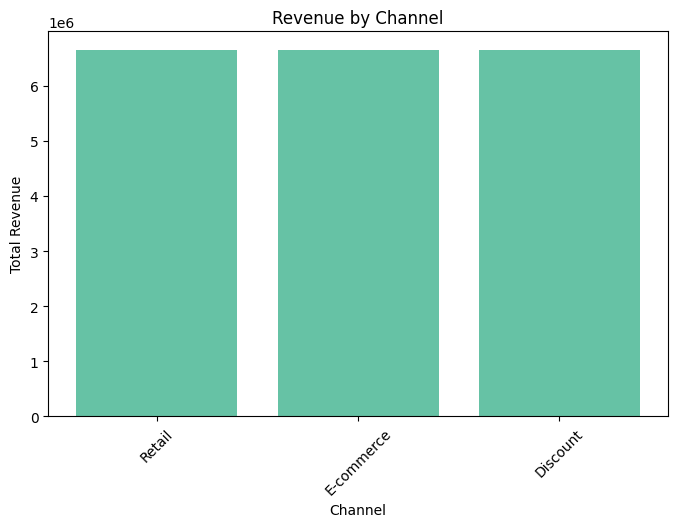

In [35]:
# Revenue by Region
region_revenue = df.groupby('region')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

# Revenue by Channel
channel_revenue = df.groupby('channel')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

# Plotting
import matplotlib.pyplot as plt

# Region Revenue Plot
plt.figure(figsize=(8,5))
plt.bar(region_revenue['region'], region_revenue['revenue'])
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Channel Revenue Plot
plt.figure(figsize=(8,5))
plt.bar(channel_revenue['channel'], channel_revenue['revenue'])
plt.title("Revenue by Channel")
plt.xlabel("Channel")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

## Observation
By Region:
Revenue is almost evenly distributed across PL-South, PL-North, and PL-Central, with no single region showing a significantly higher share. This suggests that the company has a balanced regional market presence.

By Channel:
Revenue across Retail, E-commerce, and Discount channels is also very close to each other. No channel clearly dominates, which indicates that the business has achieved a diversified sales channel strategy, reducing dependency on a single channel.

## Key Insights
The company’s revenue streams are well balanced across both regions and channels, which is a positive sign for reducing risk. However, since no strong leader exists, there may also be an opportunity to focus on scaling one high-potential region or channel for faster growth.

c) What are average stock levels by SKU/region?

In [36]:
# Average stock level by SKU
avg_stock_by_sku = (
    temp.groupby('sku')['stock_available']
    .mean()
    .reset_index(name='avg_stock')
    .sort_values(by='avg_stock', ascending=False)
)

print("Average Stock by SKU:\n", avg_stock_by_sku.head())

# Average stock level by Region
avg_stock_by_region = (
    temp.groupby('region')['stock_available']
    .mean()
    .reset_index(name='avg_stock')
    .sort_values(by='avg_stock', ascending=False)
)

print("\nAverage Stock by Region:\n", avg_stock_by_region)

Average Stock by SKU:
        sku   avg_stock
28  YO-024  159.744124
12  RE-025  158.660768
11  RE-017  158.424495
14  SN-013  158.339938
13  SN-010  158.115693

Average Stock by Region:
        region   avg_stock
1    PL-North  158.006065
2    PL-South  157.699399
0  PL-Central  157.394756


C:\Users\huzef\AppData\Local\Temp\ipykernel_22164\2600766170.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_stock', y='sku', data=top_skus, palette='Blues_r')
C:\Users\huzef\AppData\Local\Temp\ipykernel_22164\2600766170.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_stock', y='region', data=avg_stock_by_region, palette='Greens_r')


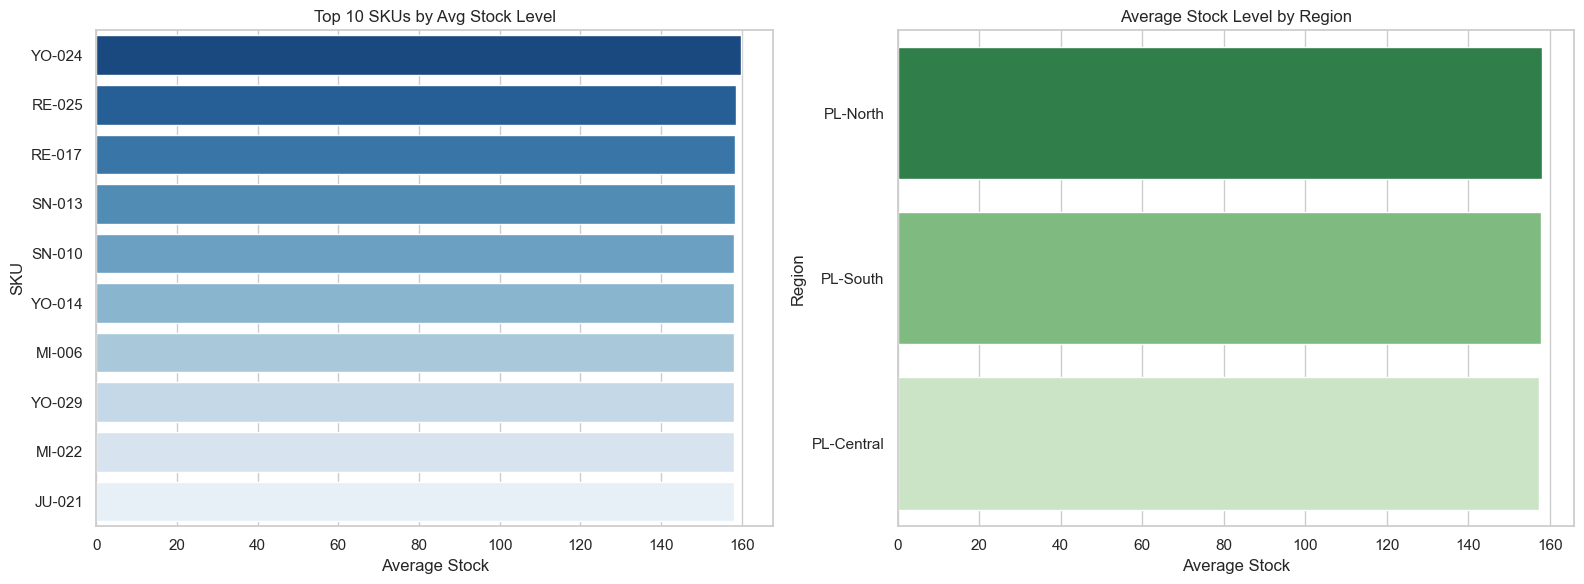

In [37]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Plot 1: Average Stock by SKU (Top 10 only)
plt.subplot(1, 2, 1)
top_skus = avg_stock_by_sku.head(10)
sns.barplot(x='avg_stock', y='sku', data=top_skus, palette='Blues_r')
plt.title('Top 10 SKUs by Avg Stock Level')
plt.xlabel('Average Stock')
plt.ylabel('SKU')

# Plot 2: Average Stock by Region
plt.subplot(1, 2, 2)
sns.barplot(x='avg_stock', y='region', data=avg_stock_by_region, palette='Greens_r')
plt.title('Average Stock Level by Region')
plt.xlabel('Average Stock')
plt.ylabel('Region')

plt.tight_layout()
plt.show()

## Observation
From the first chart, we can see the top 10 products that usually had the highest stock levels, meaning these SKUs were more frequently available in inventory. In the second chart, we see that stock availability also differs across regions. Some regions maintain higher stock on average compared to others, which may be due to demand differences or distribution strategies. This helps the company understand which products and regions are better stocked and where improvement may be needed

d) Which products frequently run out of stock?

In [38]:
stock_out_data = temp[temp['stock_out']==0]

# counts how many times a prodiuct faced stock out?
counts = stock_out_data['sku'].value_counts().reset_index()

top_stockouts = counts.head(10)

print("Products with Most Frequent Stockouts:\n")
print(top_stockouts)

Products with Most Frequent Stockouts:

      sku  count
0  MI-026   5550
1  MI-006   5498
2  YO-005   5352
3  YO-029   5314
4  YO-012   5187
5  RE-004   5156
6  YO-014   5138
7  YO-001   5134
8  RE-007   5037
9  RE-015   4893


## Observation
These results show which products were most frequently out of stock. This indicates a gap between demand and supply. If the same products repeatedly face stockouts, it means customers are demanding them more than the company is able to supply. This could lead to lost sales opportunities.

## Recommendations to Reduce Stockouts
- Demand Forecasting: Use historical sales trends to predict demand for high-selling SKUs and plan inventory accordingly.
- Safety Stock Maintenance: Keep buffer stock for frequently demanded products (especially those identified in the top stockout list).
- Supplier Coordination: Strengthen coordination with suppliers to ensure timely replenishment of fast-moving items.
- Promotion Planning: Align stock levels with promotional campaigns to avoid stockouts during demand spikes.
- Regional Redistribution: Reallocate excess stock from low-demand regions to high-demand regions facing shortages.
- Real-time Monitoring: Implement dashboards/alerts to track stockouts in real-time and take corrective action quickly.

e) Are certain delivery delays correlated with stockouts?

In [39]:
# Count of stockouts grouped by delivery status (Delayed / On Time)
stockout_count = temp.groupby(['delivery_status', 'stock_out']).size().reset_index(name='count')

# Display the result
print("Stockout Count by Delivery Status:")
print(stockout_count)

Stockout Count by Delivery Status:
  delivery_status  stock_out  count
0         Delayed      False  51544
1         Delayed       True  25245
2         On Time      False  76756
3         On Time       True  37209


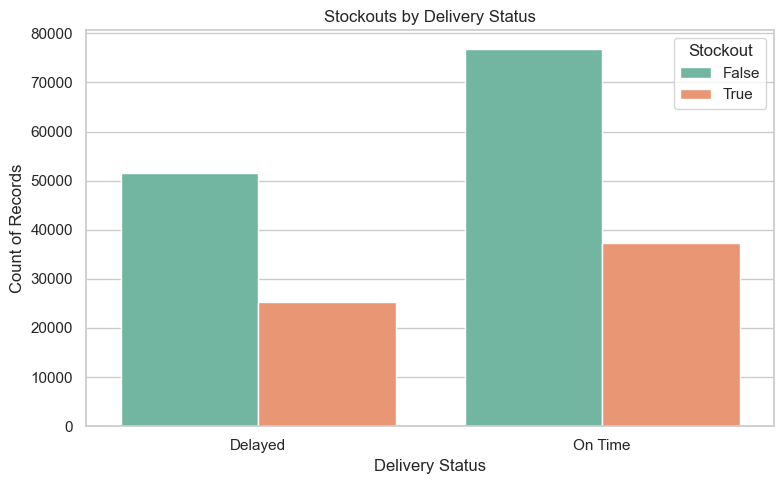

In [40]:
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=stockout_count,
    x='delivery_status',
    y='count',
    hue='stock_out',
    palette='Set2'
)

plt.title('Stockouts by Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Count of Records')
plt.legend(title='Stockout')
plt.tight_layout()
plt.show()

## Observation 
- The graph shows how stockouts are related to delivery status.
- If stockouts are more when deliveries are delayed, then late supply is the reason.
- If stockouts also happen with on-time deliveries, then the problem is not supply but less stock or wrong demand planning.

## Recommendations 
- If delay is the issue → make delivery faster and improve supply chain.
- If stock problem → keep extra safety stock and plan demand better.
- Use alerts to warn when stock is getting low

f) 

In [42]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,revenue,stock_left,stock_out,delivery_status,week,month
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42,13,True,On Time,3,2022-01
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,0.00,-129,False,On Time,3,2022-01
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00,-43,False,Delayed,3,2022-01
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12,-33,False,On Time,3,2022-01
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92,-56,False,Delayed,3,2022-01


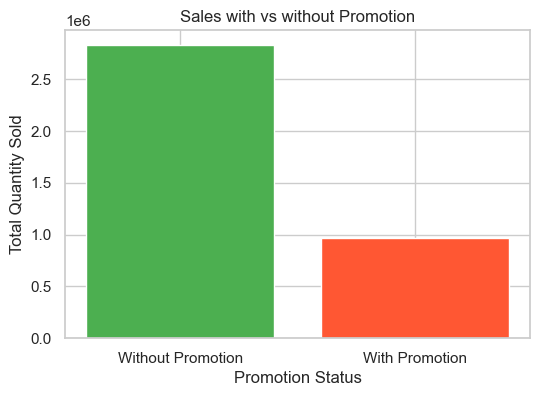

,promotion_flag,units_sold
0,Without Promotion,2830437
1,With Promotion,969423


In [44]:
# Group sales by promotion flag
promo_sales = df.groupby("promotion_flag")["units_sold"].sum().reset_index()

# Map promotion flag for clarity
promo_sales["promotion_flag"] = promo_sales["promotion_flag"].map({1: "With Promotion", 0: "Without Promotion"})

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(promo_sales["promotion_flag"], promo_sales["units_sold"], color=["#4CAF50", "#FF5733"])
plt.title("Sales with vs without Promotion")
plt.xlabel("Promotion Status")
plt.ylabel("Total Quantity Sold")
plt.show()

promo_sales

## Observation 
Observation for Your Notebook:
- Total sales without promotion are much higher compared to sales with promotion.
- This suggests that promotions were applied to fewer products or for limited periods, so the overall contribution is lower.
- However, the fact that promotions still generated close to 1 million units sold shows they are an effective tool when used strategically.

Insight: Promotions should be targeted for specific products (new launches, low-performing SKUs) rather than applied broadly, since overall base demand is already strong even without discounts.

## Overall Insights

1) Revenue Trends
- Revenue has grown steadily over time with some peaks, showing demand spikes.
- Weekly and monthly patterns highlight periods of high sales, indicating possible seasonality.
2) Top Products (SKUs)
- A few SKUs dominate both units sold and revenue, showing strong customer preference.
- Yogurt and Milk products are consistent top performers across regions. 
3) Regional & Channel Performance
- All three regions (North, South, Central) contribute significantly, but certain SKUs perform better in specific regions.
- Retail and discount channels generate high sales, proving their importance in distribution.
4) Stock Management
- Some products face frequent stockouts, especially high-demand SKUs.
- Average stock levels vary a lot between regions, meaning some areas are overstocked while others face shortages.
5) Delivery Performance
- Stockouts are often linked with delayed deliveries, showing supply chain issues.
- On-time deliveries still face some stockouts → poor inventory planning.

## Recommendations
1) Improve Demand Forecasting
- Use past sales patterns to predict demand more accurately.
- Maintain safety stock for top-selling SKUs to avoid stockouts.
2) Regional Stock Optimization
- Balance stock across regions to avoid overstocking in one region and shortages in another.
- Set region-specific stock thresholds.
3) Strengthen Supply Chain & Delivery
- Reduce delivery delays with better logistics and supplier coordination.
- Use real-time tracking for delivery and warehouse movement.
4) Channel Strategy
- Focus more on Retail and Discount channels, as they drive most sales.
- Use promotions strategically to boost sales in underperforming channels.
5) Technology Adoption
- Implement automated alerts for low-stock products.
- Use dashboards to monitor stock, revenue, and delivery in real-time.

## Conclusion
The company is performing well with strong SKUs and steady revenue growth, but inefficiencies in stock management and delivery delays are limiting its full potential. By improving demand forecasting, regional stock planning, and supply chain speed, the company can reduce stockouts, increase customer satisfaction, and maximize revenue.